In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns 
df=pd.read_csv("Customer Churn.csv")
df


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [6]:
## to inspect our data(step 1 in EDA process)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [7]:
#repplacing blanks with 0 as tenure is 0 and no total charges are recorded 
df["TotalCharges"]=df["TotalCharges"].replace(" ","0")
df["TotalCharges"]=df["TotalCharges"].astype("float")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [8]:
df.isnull().sum().sum()

0

In [9]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [11]:
df.duplicated().sum()

0

In [12]:
df["customerID"].duplicated().sum()

0

In [14]:
#converted 0 and 1 values of senior citizen to yes / no to make it easier
def conv(value):
    if value==1:
        return"yes"
    else:
        return"no"
df['SeniorCitizen']=df['SeniorCitizen'].apply(conv)
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,no,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,no,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,no,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,no,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,no,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


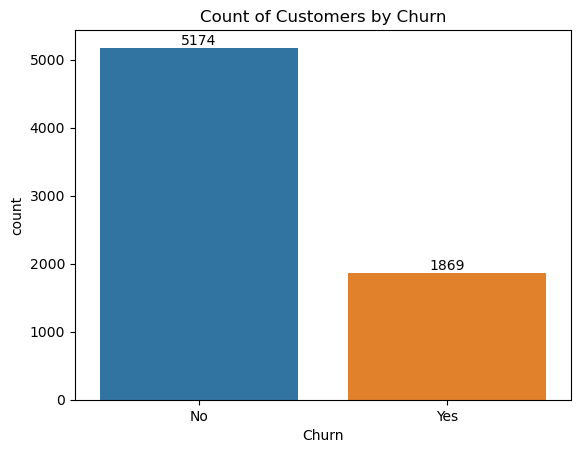

In [10]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
df=pd.read_csv("Customer Churn.csv")
ax=sns.countplot(x='Churn', data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of Customers by Churn")
plt.show()

In [18]:
!pip install seaborn


Defaulting to user installation because normal site-packages is not writeable


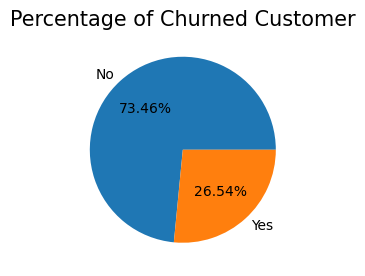

In [9]:
plt.figure(figsize=(3,4))
gb = df.groupby("Churn").agg({'Churn':'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct='%1.2f%%')
plt.title("Percentage of Churned Customer",fontsize=15)
plt.show()


# FROM THE GIVEN PIE CHART WE CAN CONCLUDE THAT 26.54% OF OUR CUSTOMERS HAVE CHURNED OUT.
#NOW LETS EPLORE THE REASON BEHIND IT.

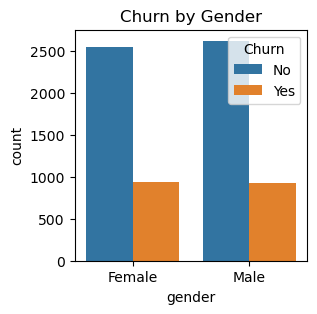

In [16]:
plt.figure(figsize=(3,3))
sns.countplot(x="gender",data=df,hue="Churn")
plt.title("Churn by Gender")
plt.show()

## comaparative  a greater % of people in senior citizen category have churned.

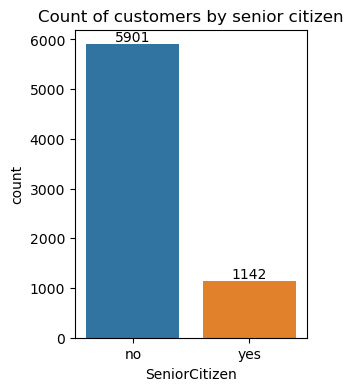

In [25]:
plt.figure(figsize=(3,4))
ax=sns.countplot(x="SeniorCitizen",data=df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by senior citizen")
plt.show()

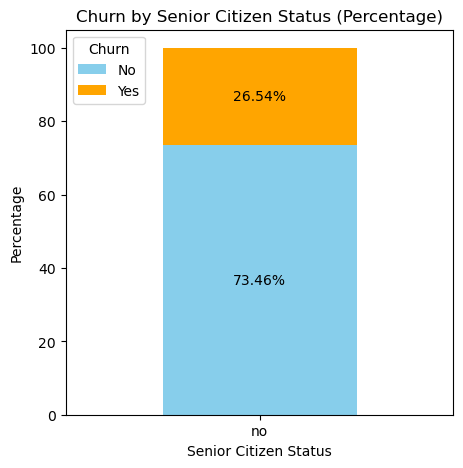

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd


# Assuming df is your dataframe and "SeniorCitizen" and "Churn" are columns

# Create a cross-tabulation of SeniorCitizen and Churn, normalize to get percentages
ct = pd.crosstab(df['SeniorCitizen'], df['Churn'], normalize='index') * 100

# Plot the stacked bar chart
ct.plot(kind='bar', stacked=True, figsize=(5, 5), color=['skyblue', 'orange'])


# Add percentage labels to the bars
for i in range(ct.shape[0]):
    for j in range(ct.shape[1]):
        plt.text(i, ct.iloc[i, j]/2 + ct.iloc[i,:j].sum(), 
                 f'{ct.iloc[i, j]:.2f}%', ha='center', va='center', color='black')

# Customize the plot
plt.title("Churn by Senior Citizen Status (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("Senior Citizen Status")
plt.xticks(rotation=0)
plt.legend(title="Churn", loc='upper left')

plt.show()


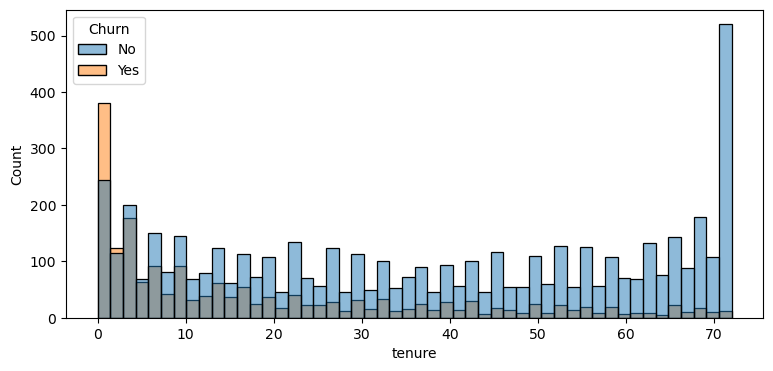

In [43]:
plt.figure(figsize=(9,4))
sns.histplot(x= "tenure",data=df,bins=50,hue="Churn")
plt.show()

#people who have used our services for a long time have stayed and people  who have used our services 1 or 2 months have churned.

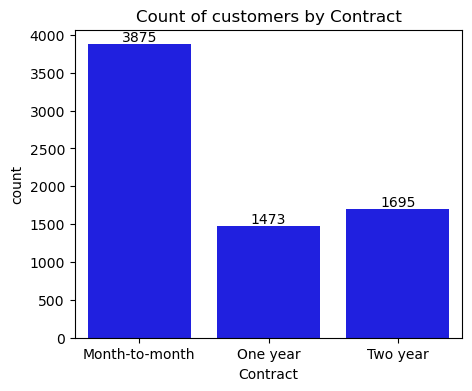

In [60]:
plt.figure(figsize=(5,4))
ax=sns.countplot(x="Contract",data=df,color='blue')
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Contract")
plt.show()

# people who have month to month contract are likely to churn then from those who have 1 or  year of contract.

In [49]:
df.columns.values

array(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges',
       'TotalCharges', 'Churn'], dtype=object)

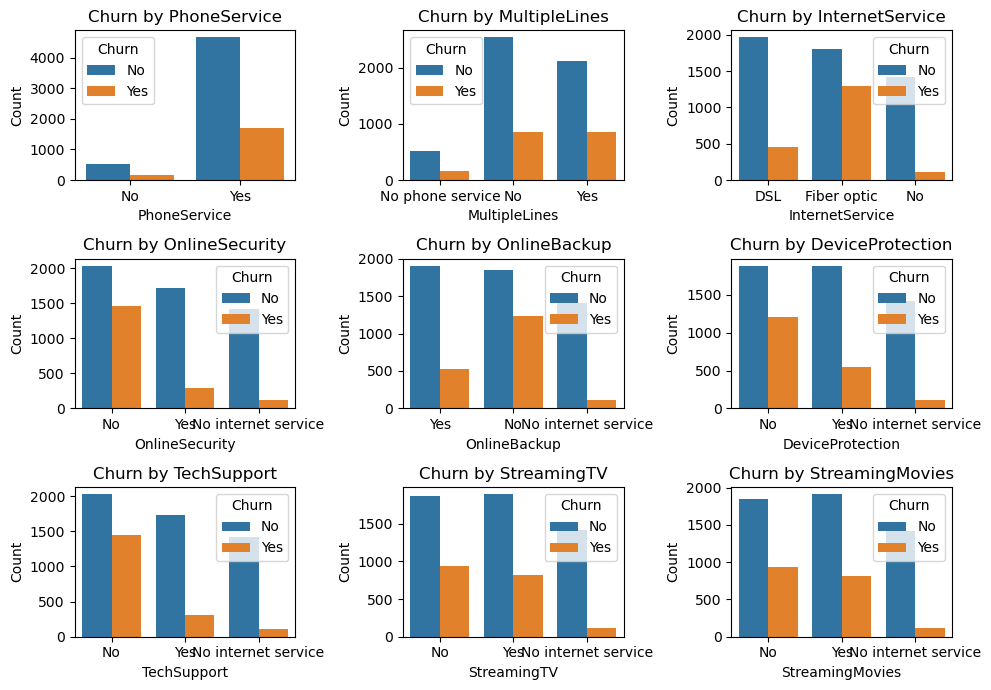

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define the list of service columns
services = ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 
            'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies']

# Create subplots (3 rows, 3 columns for 9 plots)
fig, axes = plt.subplots(3, 3, figsize=(10, 7))

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Loop through each service and create a countplot for it
for i, service in enumerate(services):
    sns.countplot(x=service, data=df, ax=axes[i],hue="Churn")
    axes[i].set_title(f"Churn by {service}")
    axes[i].set_xlabel(service)
    axes[i].set_ylabel("Count")

# Adjust the layout to avoid overlapping
plt.tight_layout()
plt.show()


# Customers with PhoneService, MultipleLines, and Fiber Optic InternetService have higher churn rates compared to those without these services. Additionally, customers lacking services like OnlineSecurity, TechSupport, and DeviceProtection show increased churn. For services like StreamingTV and StreamingMovies, the churn rates are also higher among customers using these services. Overall, the charts reveal that certain service features are associated with higher customer churn.

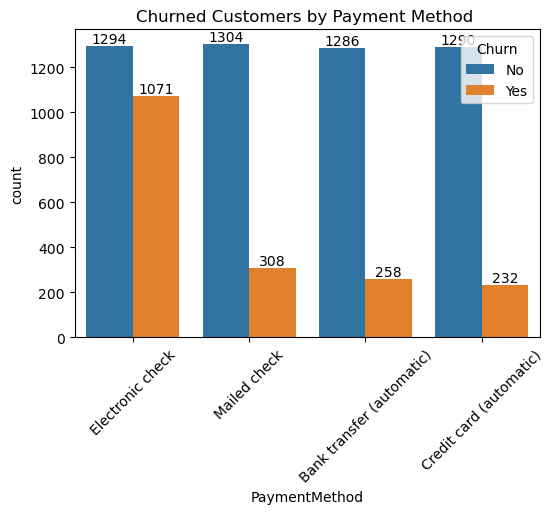

In [75]:
plt.figure(figsize=(6,4))
ax=sns.countplot(x="PaymentMethod",data=df,hue="Churn")
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
plt.title("Churned Customers by Payment Method ")
plt.xticks(rotation=45)
plt.show()

#customer is likely to churn when he is using electronic check as a payment method.